In [3]:
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

low = []
moderate = []
high = []

for study, entertainment, sleep in time_data:
    if study < 3:
        low.append(study)
    elif 3 <= study <= 5:
        moderate.append(study)
    else:
        high.append(study)

print("Low study hours (<3):", low)
print("Moderate study hours (3–5):", moderate)
print("High study hours (>5):", high)


Low study hours (<3): [2.5, 1.5, 2.0, 2.5]
Moderate study hours (3–5): [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study hours (>5): [5.5, 6.0]


In [4]:
print("Number of low study days:", len(low))
print("Number of moderate study days:", len(moderate))
print("Number of high study days:", len(high))


Number of low study days: 4
Number of moderate study days: 9
Number of high study days: 2


In [5]:
study_minutes = [] 

for study, entertainment, sleep in time_data:
    minutes = study * 60
    study_minutes.append(minutes)

print("Study hours converted to minutes:", study_minutes)


Study hours converted to minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


In [6]:
study_hours = []
entertainment_hours = []
sleep_hours = []

for study, entertainment, sleep in time_data:
    study_hours.append(study)
    entertainment_hours.append(entertainment)
    sleep_hours.append(sleep)

avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("Average study hours:", avg_study)
print("Average entertainment hours:", avg_entertainment)
print("Average sleep hours:", avg_sleep)


Average study hours: 3.7
Average entertainment hours: 2.5
Average sleep hours: 7.166666666666667


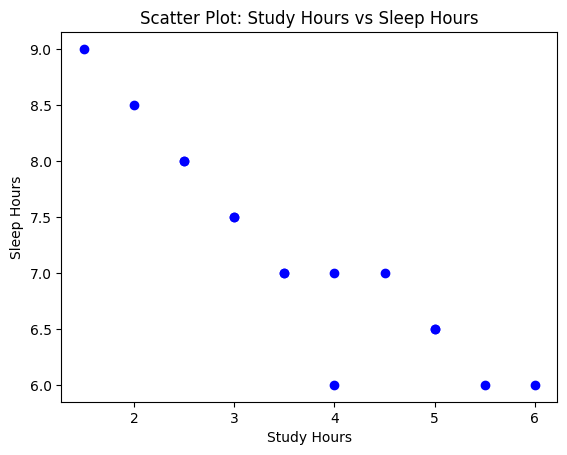

In [8]:
import matplotlib.pyplot as plt

plt.scatter(study_hours, sleep_hours, color='blue')   # you may choose any color

plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Scatter Plot: Study Hours vs Sleep Hours")

plt.show()


In [10]:
def sum_nested_list(nested_list):
    """
    Calculate the sum of all numbers in a nested list.
    This function takes a list that may contain integers and other nested lists.
    It recursively traverses the list and sums all the integers, 
    no matter how deeply nested they are.

    Args:
        nested_list (list): A list that may contain integers or other lists.

    Returns:
        int: The total sum of all integers in the nested list.
    """
    total = 0
    for element in nested_list:
        if isinstance(element, list):  
            total += sum_nested_list(element)
        else:
            total += element         
    return total

nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
result = sum_nested_list(nested_list)
print("Total sum:", result)


Total sum: 36


In [11]:
def generate_permutations(s):
    if len(s) <= 1:
        return [s]
    
    perms = set()
    for i in range(len(s)):
        for p in generate_permutations(s[:i] + s[i+1:]):
            perms.add(s[i] + p)
    return list(perms)

# Test
print(generate_permutations("abc"))
print(generate_permutations("aab"))


['cba', 'bac', 'cab', 'bca', 'acb', 'abc']
['aab', 'baa', 'aba']


In [12]:
def calculate_directory_size(directory):
    total = 0
    for item in directory.values():
        total += calculate_directory_size(item) if isinstance(item, dict) else item
    return total

# Test
directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

print(calculate_directory_size(directory_structure))


1400


In [13]:
def min_coins(coins, amount):
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0   
    
    for coin in coins:
        for x in range(coin, amount + 1):
            dp[x] = min(dp[x], dp[x - coin] + 1)
    
    return dp[amount] if dp[amount] != float('inf') else -1
    
print(min_coins([1, 2, 5], 11))   
print(min_coins([2], 3))          


3
-1


In [18]:
def min_coins(coins, amount):
    """
    Finds the minimum number of coins needed to make up a given amount using dynamic
    programming.
    
    This function solves the coin change problem by determining the fewest number of
    coins from a given set of coin denominations that sum up to a target amount. The
    solution uses dynamic programming (tabulation) to iteratively build up the minimum
    number of coins required for each amount.
    
    Parameters:
        coins (list of int): A list of coin denominations available.
        amount (int): The target amount.
    
    Returns:
        int: The minimum number of coins needed to make the amount.
             Returns -1 if it is not possible.
    
    Example:
        >>> min_coins([1, 2, 5], 11)
        3
        >>> min_coins([2], 3)
        -1
    """
    
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0
    
    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)
    
    return dp[amount] if dp[amount] != float('inf') else -1
    


In [19]:
print(min_coins([1, 2, 5], 11)) 

3


In [23]:
def longest_common_subsequence(s1, s2):
    n, m = len(s1), len(s2)
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[n][m]
print(longest_common_subsequence("abcde", "ace"))  


3


In [24]:
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    
    return dp[n][capacity]

weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]
capacity = 5

print(knapsack(weights, values, capacity))  


7


In [25]:
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    
    return dp[n][capacity]

weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7

print(knapsack(weights, values, capacity))  

9
